In [ ]:
import zipfile
import os, pathlib, PIL, shutil, glob
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.core.dtypes.api import is_numeric_dtype, is_string_dtype
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import KNNImputer
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport,ClassPredictionError, ROCAUC, PrecisionRecallCurve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import precision_score, recall_score
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from itertools import chain
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

import nltk
nltk.download('stopwords', quiet=True)
# nltk.download('punkt', quiet=True)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn
import numpy as np
import pandas as pd


from sklearn import feature_extraction
from sklearn.metrics import confusion_matrix
from sklearn import model_selection as ms
from sklearn import naive_bayes
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

## carga dataset desde kaggle (opcional)

In [ ]:
!pip install kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samaell","key":"ddf91ddea2a65a393a31837a921c7d18"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d  #aqui va el link del dataset
!ls # Revisión de archivos descargados

## dataset y analisis (https://www.kaggle.com/code/kishanakbari/website-classification-using-naive-bayes)

In [ ]:
df = pd.read_csv("/content/data.csv")
df.drop(['index'], inplace=True, axis=1)
df.drop(['website_url'], inplace=True, axis=1)

In [ ]:
df.head(50)

,cleaned_website_text,Category
0,official site good hotel accommodation big sav...,Travel
1,expedia hotel book sites like use vacation wor...,Travel
2,tripadvisor hotel book sites like previously d...,Travel
3,cheap flights search compare flights momondo f...,Travel
4,bot create free account create free account si...,Travel
5,hotel reservations bundle save book flight sal...,Travel
6,official travel deals promotion choose million...,Travel
7,bot create free account create free account si...,Travel
8,bot create free account create free account si...,Travel
9,cheap hotels cars flights minute travel deals ...,Travel


In [ ]:
df.tail(10)

,cleaned_website_text,Category
1398,uk domme mistress abigail zulu bitch london mi...,Adult
1399,gaymale softcore free nude pictures phone sex ...,Adult
1400,zen cart art e commerce sex toy accessories fe...,Adult
1401,page find free porn pass word online sex indus...,Adult
1402,mypleasure secure trust online sex toy store s...,Adult
1403,old nude women porn mature granny sex horny ol...,Adult
1404,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult
1405,porno dvd online european porn dvd cheap adult...,Adult
1406,anal dream house anal dream house anal dream h...,Adult
1407,world sex news daily sex news adult news eroti...,Adult


In [ ]:
num_categories = df['Category'].nunique()
print("Número de categorías:", num_categories)

Número de categorías: 16


In [ ]:
catg = list(df['Category'].unique())
df['Category'].unique()

array(['Travel', 'Social Networking and Messaging', 'News',
       'Streaming Services', 'Sports', 'Photography',
       'Law and Government', 'Health and Fitness', 'Games', 'E-Commerce',
       'Forums', 'Food', 'Education', 'Computers and Technology',
       'Business/Corporate', 'Adult'], dtype=object)

In [ ]:
#ver datos nulos?:
print(df.isnull().sum())

cleaned_website_text    0
Category                0
dtype: int64


In [ ]:
duplicados = df[df.duplicated()]  #  registros duplicados
print("Registro duplicados :" ,duplicados.shape)
df.drop_duplicates(inplace=True)
print("Registros eliminados: ", duplicados.shape)

Registro duplicados : (33, 2)
Registros eliminados:  (33, 2)


In [ ]:
catg

['Travel',
 'Social Networking and Messaging',
 'News',
 'Streaming Services',
 'Sports',
 'Photography',
 'Law and Government',
 'Health and Fitness',
 'Games',
 'E-Commerce',
 'Forums',
 'Food',
 'Education',
 'Computers and Technology',
 'Business/Corporate',
 'Adult']

In [ ]:
for index, i in enumerate(catg):
    print(f'"{i}": {index},')

"Travel": 0,
"Social Networking and Messaging": 1,
"News": 2,
"Streaming Services": 3,
"Sports": 4,
"Photography": 5,
"Law and Government": 6,
"Health and Fitness": 7,
"Games": 8,
"E-Commerce": 9,
"Forums": 10,
"Food": 11,
"Education": 12,
"Computers and Technology": 13,
"Business/Corporate": 14,
"Adult": 15,


In [ ]:
category_num = {
    "Travel": 0,
    "Social Networking and Messaging": 1,
    "News": 2,
    "Streaming Services": 3,
    "Sports": 4,
    "Photography": 5,
    "Law and Government": 6,
    "Health and Fitness": 7,
    "Games": 8,
    "E-Commerce": 9,
    "Forums": 10,
    "Food": 11,
    "Education": 12,
    "Computers and Technology": 13,
    "Business/Corporate": 14,
    "Adult": 15,
}


df.replace({'Category': category_num}, inplace=True)

In [ ]:
df

,cleaned_website_text,Category
0,official site good hotel accommodation big sav...,0
1,expedia hotel book sites like use vacation wor...,0
2,tripadvisor hotel book sites like previously d...,0
3,cheap flights search compare flights momondo f...,0
4,bot create free account create free account si...,0
...,...,...
1403,old nude women porn mature granny sex horny ol...,15
1404,bdsm cams bdsm chat bondage cams free bdsm vid...,15
1405,porno dvd online european porn dvd cheap adult...,15
1406,anal dream house anal dream house anal dream h...,15


In [ ]:
df.tail()

,cleaned_website_text,Category
1403,old nude women porn mature granny sex horny ol...,15
1404,bdsm cams bdsm chat bondage cams free bdsm vid...,15
1405,porno dvd online european porn dvd cheap adult...,15
1406,anal dream house anal dream house anal dream h...,15
1407,world sex news daily sex news adult news eroti...,15


In [ ]:
Entradas = df.iloc[:, 0].values
Salida = y = df.iloc[:,-1].values

In [ ]:
longitudes = df['cleaned_website_text'].str.len()

# Calcular el promedio de las longitudes
promedio = longitudes.mean()

print('promedio de las longitudes:', promedio)

promedio de las longitudes: 5244.845090909091


#modelos

## Naive Bayes

In [ ]:
counts = feature_extraction.text.CountVectorizer()
extractor = counts.fit(Entradas)
X = counts.fit_transform(Entradas)
X.shape

(1375, 60031)

In [ ]:
# Dividir en entrenamiento (70%) y temporal (30%)
X_train, X_test, y_train, y_test = ms.train_test_split(X, Salida, test_size=0.2, random_state=42)

# Dividir el conjunto temporal en prueba (20%) y validación (10%)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [ ]:
# Clasificador Naive Bayes

model_naive = naive_bayes.MultinomialNB()
model_naive.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_train_pred = model_naive.predict(X_train)
y_test_pred = model_naive.predict(X_test)

# Accuracy check

print('Train accuracy:', round(accuracy_score(y_train, y_train_pred),2))
print('Test accuracy:', round(accuracy_score(y_test, y_test_pred),2))

Train accuracy: 0.98
Test accuracy: 0.84


In [ ]:
model_naive.score(X_train, y_train)

0.980909090909091

<Axes: >

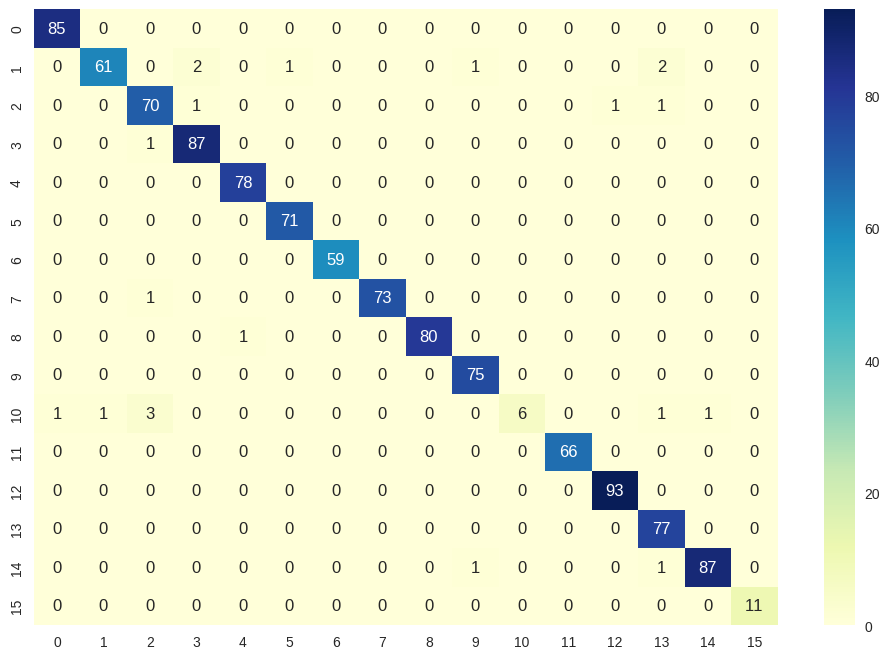

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True,
           cmap='YlGnBu')

la categoria 10 no se puede estimar muy bien, tambien tiene la mayor cantidad de falsos negativos con un total de 7.

la categoria 15 no tiene muy buena estimacion pero no posee ni falsos negativos ni falsos positivos,

<Axes: >

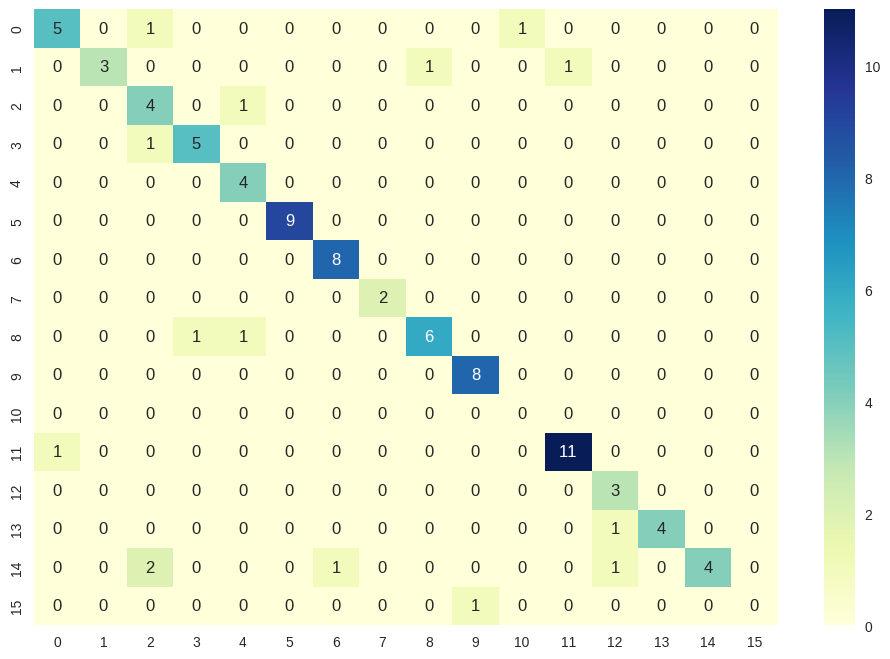

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True,cmap='YlGnBu')

la categoria 2 presenta 4 falsos positivos ( 3("streaming service"), 0("travel") y 14("Business/Corporate) teniendo en cuenta que 2 hace relacion a un sitio web de tipo "News").

la categoria 14 ("Business/Corporate") presenta un total de 4 falsos negativos (2 de la categoria 2("News") uno de la categoria 1("Social Networking and messaging"))

para este caso la categoria 10 no se pudo estimar muy bien, esto sucedio igual que en el entrenamiento, si embargo, aqui en el testeo no presenta falsos negativos, caso contrario al entrenamiento

la categoria 15 tampoco se estimo correctamente, pero solo para el testeo.

In [ ]:
# Calcular la exactitud (accuracy) del modelo
accuracy = accuracy_score(y_test, y_test_pred)

print("Exactitud del modelo: {:.2f}%".format(accuracy * 100))

Exactitud del modelo: 83.52%


la exactitud del 83.52% del algoritmo de clasifiacion naive bayes es la mas alta.

Exactitud: 83.51648351648352 %


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


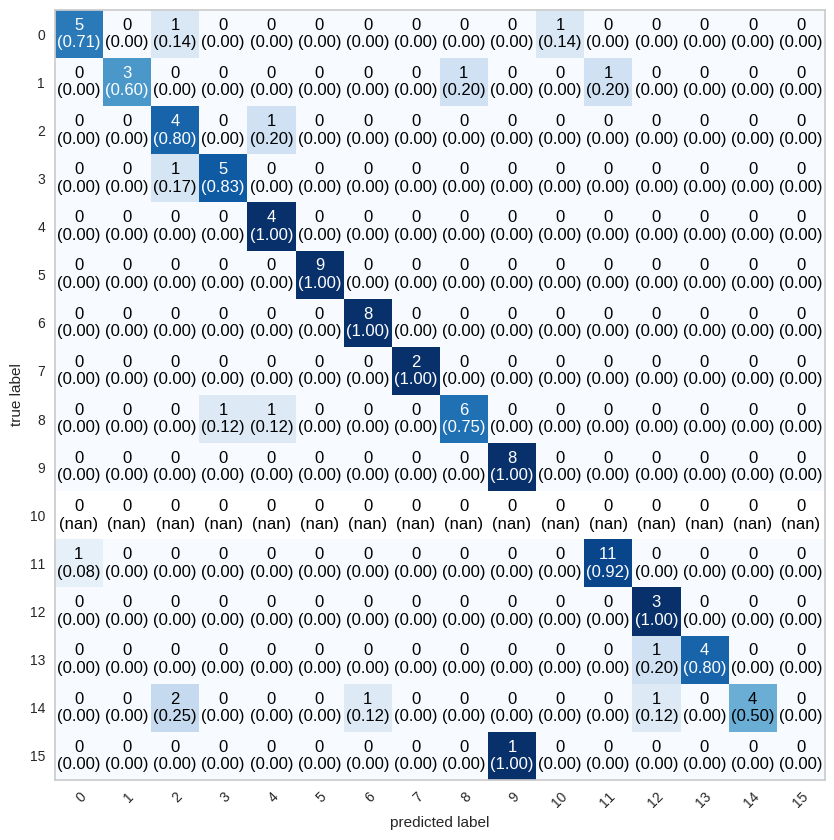

In [ ]:
print('Exactitud:', accuracy_score(y_test, y_test_pred)*100,"%")
fig, ax = plot_confusion_matrix(confusion_matrix(y_test, y_test_pred),
                                show_normed=True, class_names=class_names, figsize=(12,10))

## SVM

**analisis de complejidad (SVM)**

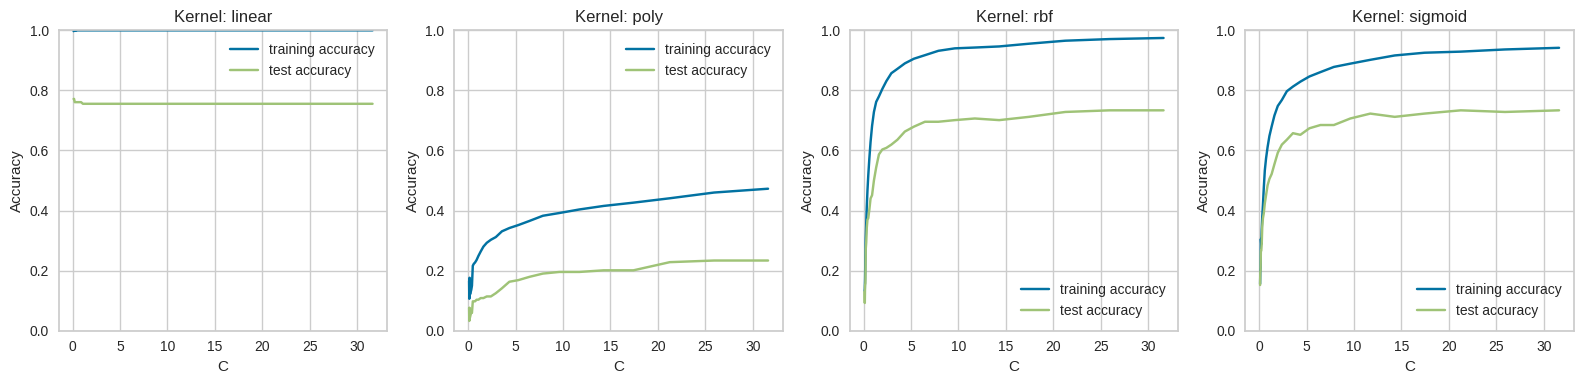

In [ ]:
C_values = np.logspace(-1,1.5,30)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
fig, axes = plt.subplots(ncols=len(kernels), figsize=(16, 4))
for i, kernel in enumerate(kernels):
    training_accuracies = []
    test_accuracies = []
    for C_value in C_values:
        clf_svm = SVC(kernel=kernel, C=C_value, class_weight='balanced', random_state=42)
        clf_svm.fit(X_train, y_train)
        training_accuracies.append(clf_svm.score(X_train, y_train))
        test_accuracies.append(clf_svm.score(X_val, y_val))
    plt.subplot(1, len(kernels), i + 1)
    plt.plot(C_values, training_accuracies, label="training accuracy")
    plt.plot(C_values, test_accuracies, label="test accuracy")
    plt.title(f'Kernel: {kernel}')
    plt.ylabel("Accuracy")
    plt.xlabel("C")
   # plt.xscale('log')
    plt.ylim(0,1)
    plt.legend()
plt.tight_layout()

plt.show()

kernel (linear) = se toma el linear ya que para ambos casos los valores de training y text tienen valores de accuracy mas altos que los demas kernel.

kernel (poly) = se descarta ya que los valores de accuracy estan por debajo del 60%

kernel (rbf y sigmoid) = este podria haber sido un buen kernel, sin embargo, el valor del test en comparacion al lienar esta por debajo del 80%.

In [ ]:
svc_model = SVC(C = 9, kernel = 'linear')
svc_model.fit(X_train,y_train)
y_gorro_train = svc_model.predict(X_train)
y_gorro_test = svc_model.predict(X_test)

In [ ]:
class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']

<Axes: >

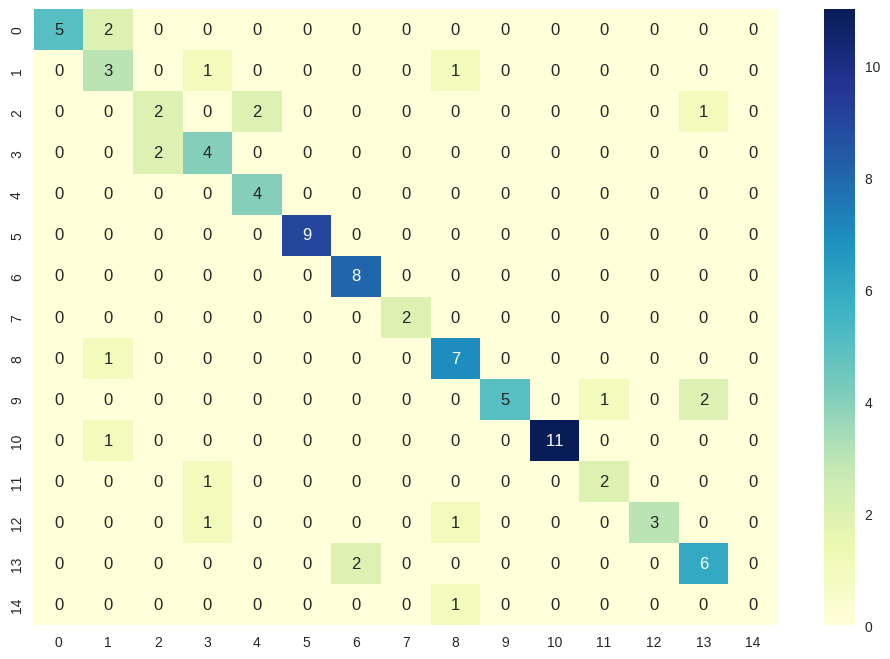

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_gorro_test),annot=True,cmap='YlGnBu')

la matriz de confusion del testeo del modelo SVM tambien es un poco mejor que la matriz de confusion del testeo del modelo naive bayes.


<Axes: >

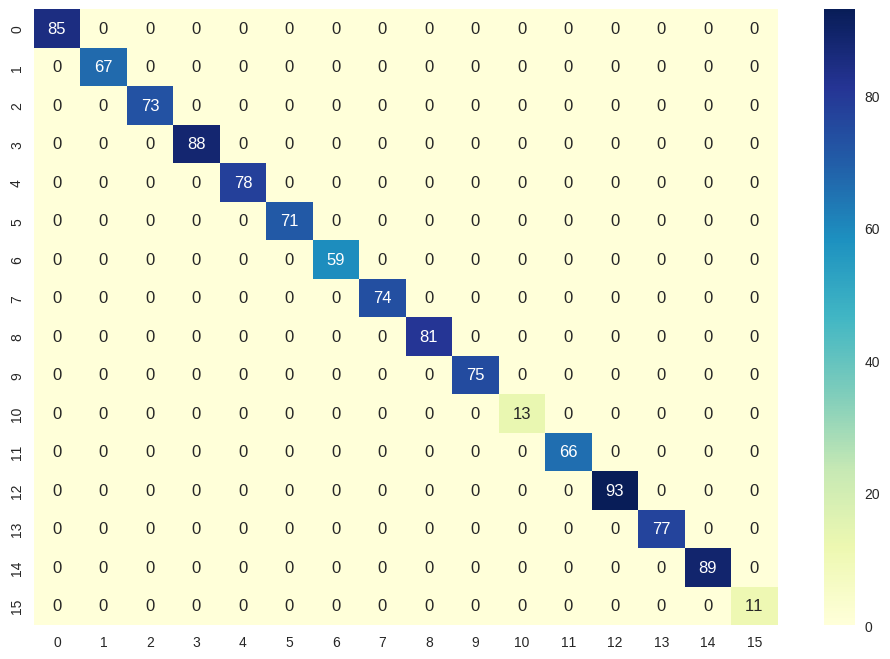

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(confusion_matrix(y_train, y_gorro_train),annot=True,cmap='YlGnBu')

la matriz de confusion para el entrenamiento de svm tiene un poco mas de desempeño en comparacion a la matriz de confusion de entrenamiento del modelo naive bayes. solo en la clase 10 que tenia problemas, aqui su valor es un poco mas alto.

In [ ]:
# Calcular la exactitud (accuracy) del modelo
accuracy = accuracy_score(y_test, y_gorro_test)

print("Exactitud del modelo: {:.2f}%".format(accuracy * 100))

Exactitud del modelo: 78.02%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


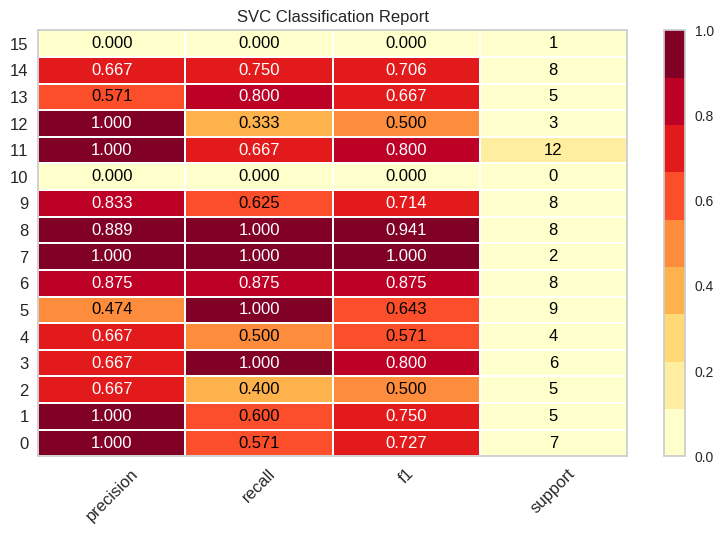

In [ ]:
visualizer = ClassificationReport(clf_svm, classes=class_names, support=True, zero_division=1)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## Desicion tree

**analisis de complejidad (Desicion Tree)**

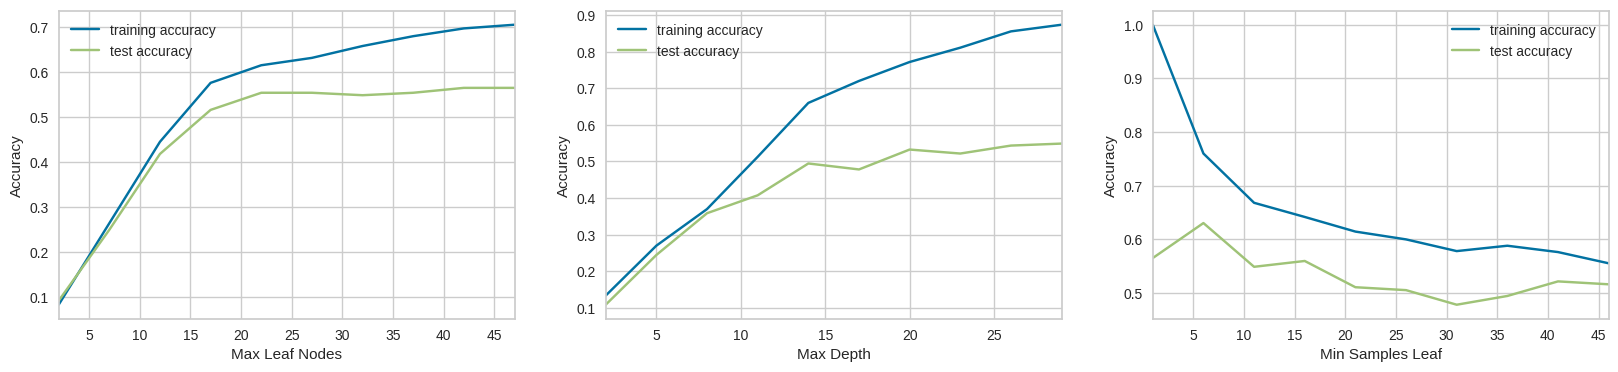

In [ ]:
hyperparameters = [
    ('Max Leaf Nodes', range(2, 50, 5)),
    ('Max Depth', range(2, 30, 3)),
    ('Min Samples Leaf', range(1, 50, 5))
]

fig, axes = plt.subplots(ncols=3, figsize=(20, 4))

for i, (param_name, param_values) in enumerate(hyperparameters):
    training_accuracy = []
    test_accuracy = []

    for param_value in param_values:
        dtr = DecisionTreeClassifier(random_state=0,class_weight='balanced')

        if param_name == 'Max Leaf Nodes':
            dtr.max_leaf_nodes = param_value
        elif param_name == 'Max Depth':
            dtr.max_depth = param_value
        elif param_name == 'Min Samples Leaf':
            dtr.min_samples_leaf = param_value

        dtr.fit(X_train, y_train)
        training_accuracy.append(dtr.score(X_train, y_train))
        test_accuracy.append(dtr.score(X_val, y_val))

    plt.subplot(1, 3, i + 1)
    plt.plot(param_values, training_accuracy, label="training accuracy")
    plt.plot(param_values, test_accuracy, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel(param_name)
    plt.xlim(min(param_values), max(param_values))
    plt.legend()

plt.show()

se toma (Max Leaf Nodes) ya que el accuracy para el train tiende a mas del 0.7 y el test tomo un valor maximo de casi 0.55

Max_depht : posiblemente la mejor opcion ya que el train tiende casi a 1 y el test tiene un valor similar o mayor al de max leaf nodes, sim embargo a la hora de ver su exactitud con max  depth su valor es inferior al obtenido por parte al de max leaf nodes.

min samples leaf: este se descarta de inmediato ya que tanto el train como el test decaen de manera sublime.

In [ ]:
dtr = DecisionTreeClassifier(random_state=0, class_weight='balanced', max_leaf_nodes=9)
dtr.fit(X_train, y_train)
y_gorro_train = dtr.predict(X_train)
y_gorro_test = dtr.predict(X_test)

grafico arbol de desiciones

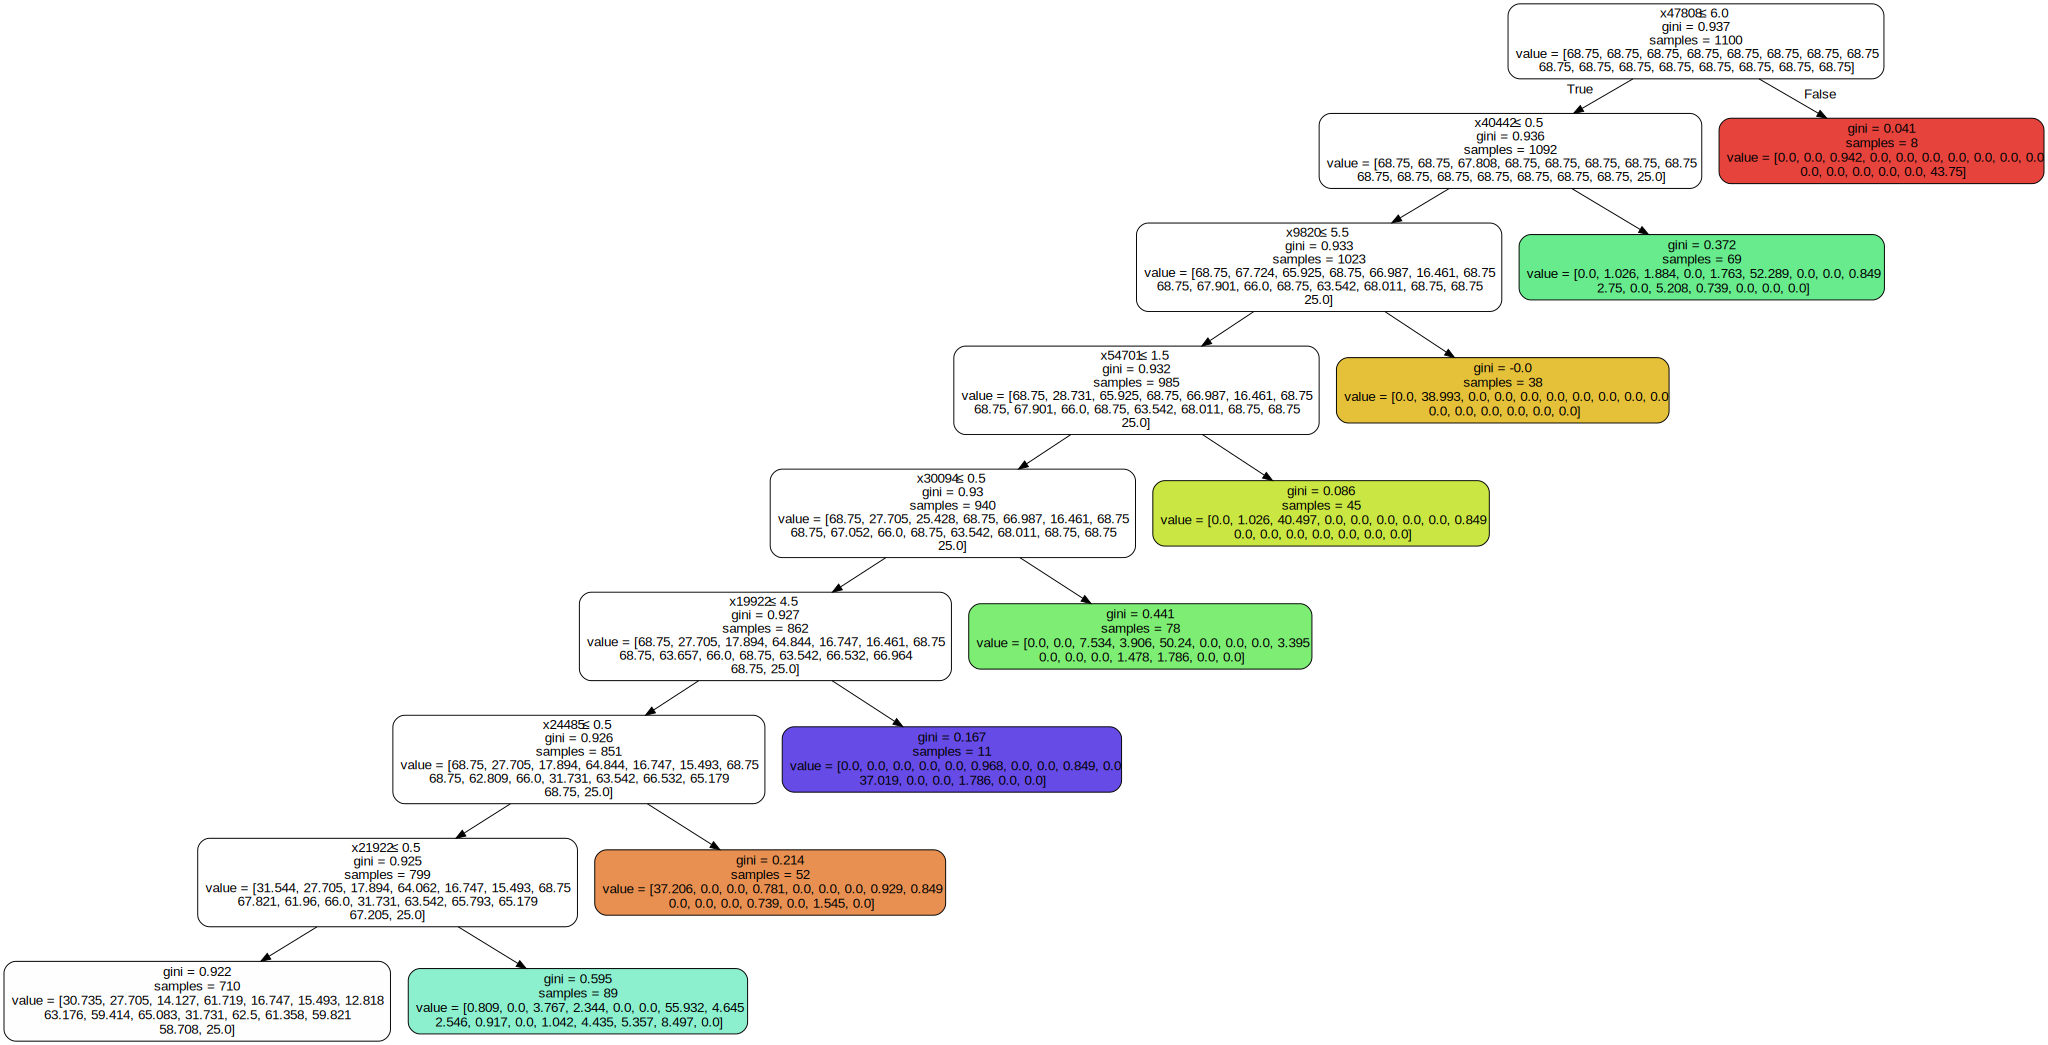

In [ ]:
dot_data = export_graphviz(dtr, out_file = "arbol.dot", filled=True, rounded=True, special_characters=True)
with open("arbol.dot") as f:
  dot_data = f.read()
display(graphviz.Source(dot_data))

<Axes: >

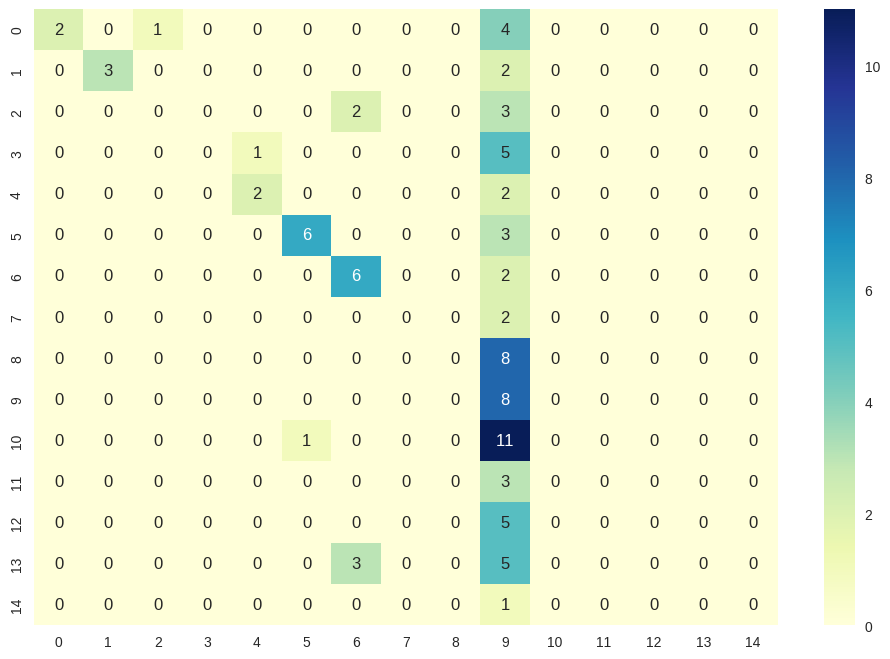

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_gorro_test),annot=True,cmap='YlGnBu')

<Axes: >

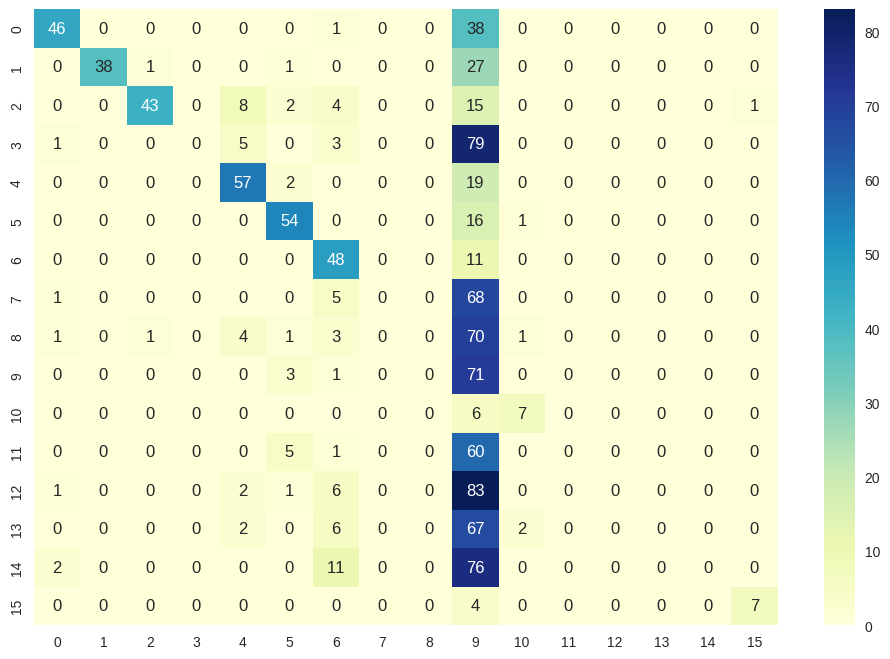

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(confusion_matrix(y_train, y_gorro_train),annot=True,cmap='YlGnBu')

tanto para el testeo como para el entrenamiento la matriz de confusion del modelo desicion tree no da muy buenos resultados, teniendo en cuenta que ya hay mas de una categoria que no se puede estimar correctamente.

In [ ]:
# Calcular la exactitud (accuracy) del modelo
accuracy = accuracy_score(y_test, y_gorro_test)

print("Exactitud del modelo: {:.2f}%".format(accuracy * 100))

Exactitud del modelo: 29.67%


la exactitud mas baja se la lleva este modelo con un valor de 29.67%

Curvas ROCAUC

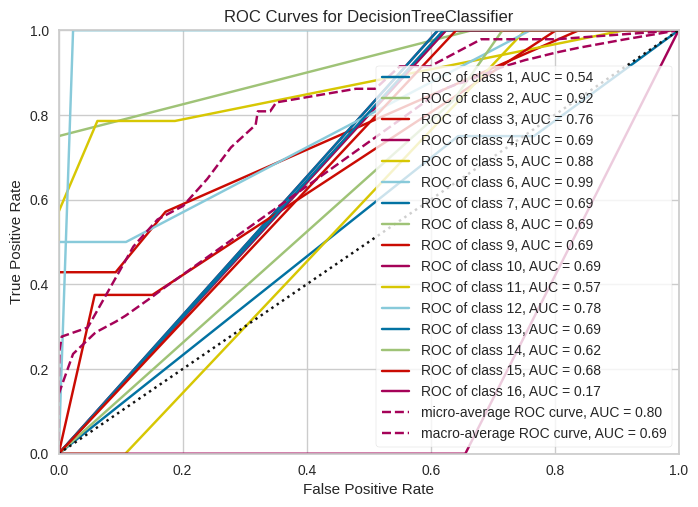

In [ ]:
visualizer = ROCAUC(dtr, classes=class_names)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## comparacion (SVM, DESICION TREE, NAIVE)

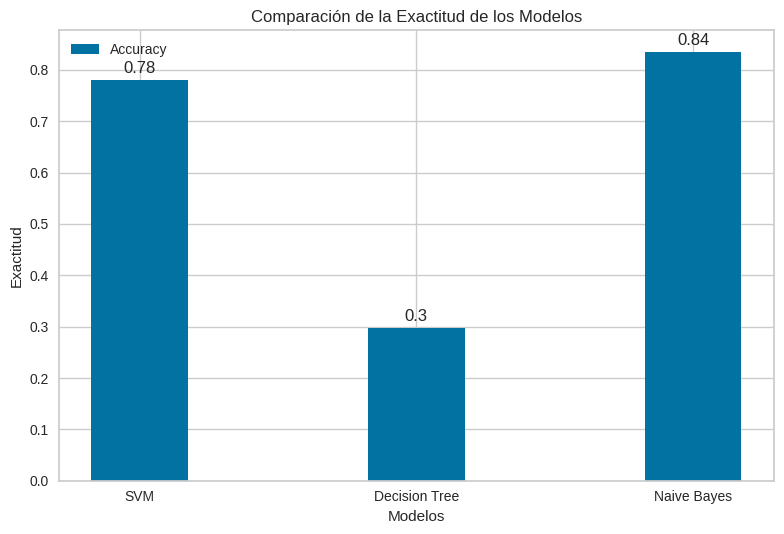

In [ ]:
# Hacer predicciones en el conjunto de prueba
svm_predictions = svc_model.predict(X_test)
tree_predictions = dtr.predict(X_test)
nb_predictions = model_naive.predict(X_test)

# Calcular la exactitud de cada modelo
svm_accuracy = accuracy_score(y_test, svm_predictions)
tree_accuracy = accuracy_score(y_test, tree_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Visualizar la comparación de la exactitud de los modelos en forma de gráfica
labels = ['SVM', 'Decision Tree', 'Naive Bayes']
accuracy_scores = [svm_accuracy, tree_accuracy, nb_accuracy]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars = ax.bar(x, accuracy_scores, width, label='Accuracy')

ax.set_xlabel('Modelos')
ax.set_ylabel('Exactitud')
ax.set_title('Comparación de la Exactitud de los Modelos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(bars):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars)

fig.tight_layout()

plt.show()

conclusiones.

los mejores modelos propuestos para este caso son SVM y NAIVE BAYES, a pesar de que las mejores matrices de confusion se las llevo SVM por valores minimos, el accuracy mas alto lo tiene NAIVE BAYES, como se muestra en la grafica de arriba.

en un principio se planteo dejar como modelo definitivo el SVM sin embargo a la hora de la practica, quien tuvo mejores resultados fue NAIVE BAYES, cambios leves pero muy exactos en cuanto a clasificar un tipo de sitio web con base a su contenido.